In [1]:
import numpy as np
from python_vehicle_simulator.vehicles import otter
from python_vehicle_simulator.lib import *

Inputs:
    r: desired heading angle (deg)
    V_current: current speed (m/s)
    beta_current: current direction (deg)
    tau_X: surge force, pilot input (N)        
"""

In [19]:
vehicle = otter('headingAutopilot',
                r=60.0,
                V_current=0.0,
                beta_current=0.0,
                tau_X=200.0
                ) 

In [17]:
def PID(
    e_int,
    e_x,
    e_v,
    x_d,
    v_d,
    a_d,
    Kp,
    Ki,
    Kd,
    wn_d,
    zeta_d,
    r,
    v_max,
    sampleTime,
):

    # PID control law
    u = -Kp * e_x - Kd * e_v - Ki * e_int

    # Integral error, Euler's method
    e_int += sampleTime * e_x

    # 3rd-order reference model for smooth position, velocity and acceleration
    [x_d, v_d, a_d] = refModel3(x_d, v_d, a_d, r, wn_d, zeta_d, v_max, sampleTime)

    return u, e_int, x_d, v_d, a_d

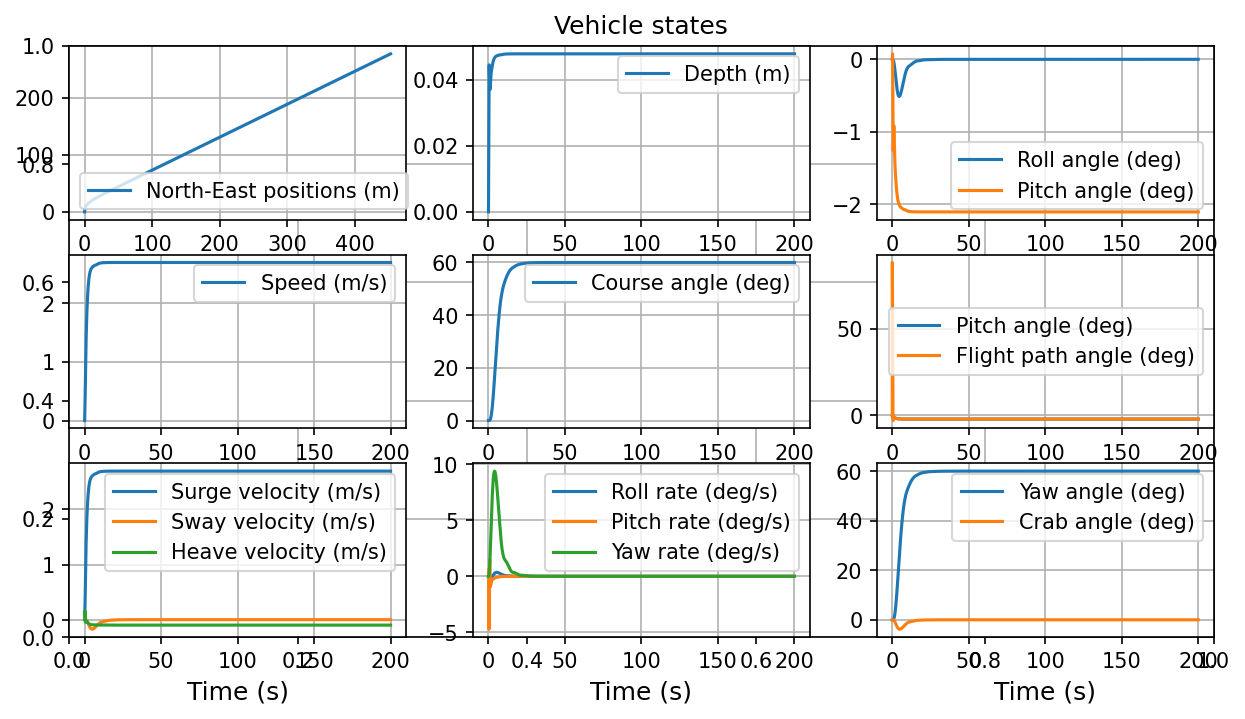

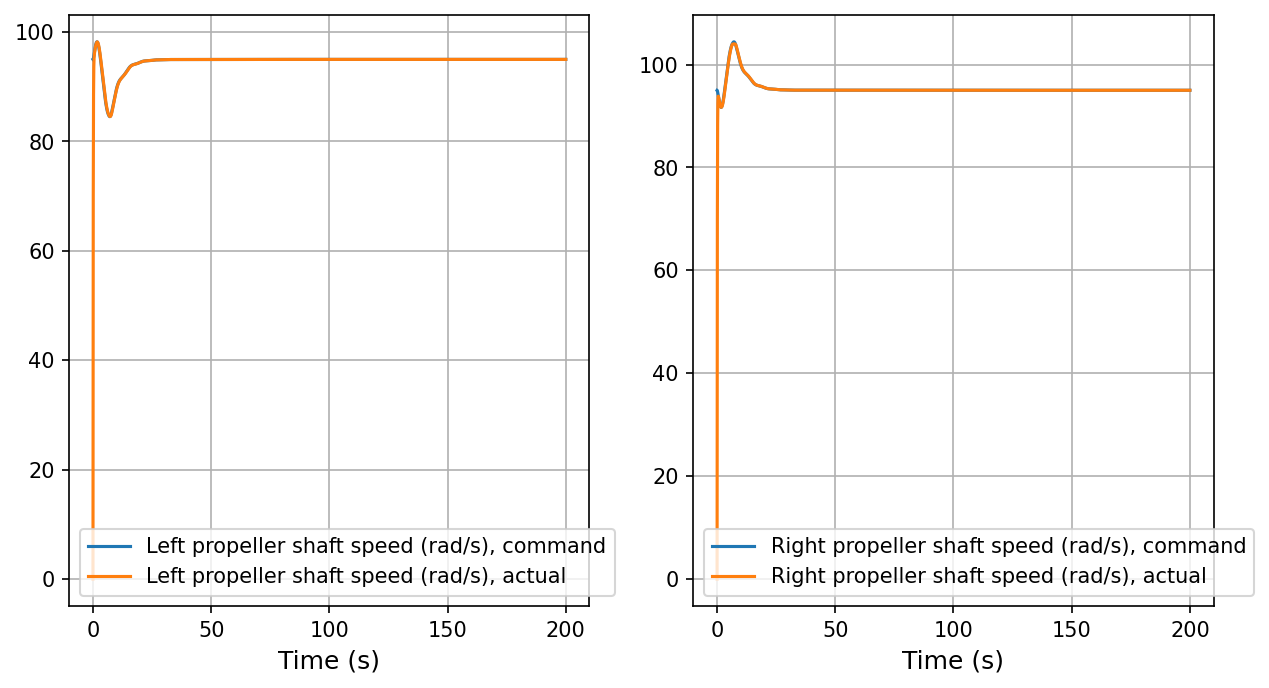

In [20]:
sampleTime = 0.02
N = 10000

def main():    
    
    [simTime, simData] = simulate(N, sampleTime, vehicle)
    
    plotVehicleStates(simTime, simData, 1)                    
    plotControls(simTime, simData, vehicle, 2) 
    
    plt.show()
    plt.close()

main()
